<a href="https://colab.research.google.com/github/JuanDavidCastillo/juandavidcastillo/blob/main/parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cual es la señal obtenida en tiempo discreto al utilizar un
conversor analogo digital con frecuencia de muestreo de
5kHz, aplicado a la senal continua  x(t) = 3 cos(1000πt) +
5 sin(2000πt) + 10 cos(11000πt)?. Realizar la simulacion
del proceso de discretizacion. En caso de que la discretizacion no sea apropiada, diseñe e implemente un conversor
adecuado para la senal estudiada.

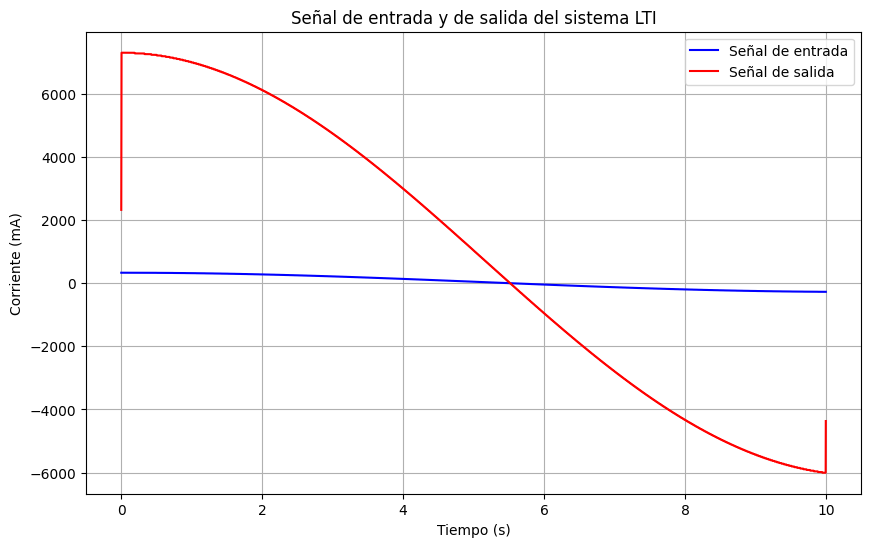

In [ ]:
import numpy as np

# Parámetros de discretización y cuantificación
T_muestreo = 0.001  # Periodo de muestreo de 1 ms
t = np.arange(0, 10, T_muestreo)  # Vector de tiempo de 0 a 10 segundos
x_analogica = 20 * (np.cos(t / 3) + np.cos(t / 4))  # Señal de entrada

# Escalamiento y desplazamiento de la señal de entrada
x_analogica = 8 * x_analogica + 12  # Escalamiento y desplazamiento

# Cuantificación de la señal de entrada a 4 bits (16 niveles)
niveles = 16
max_corriente = 20  # mA
min_corriente = 4  # mA
rango_corriente = max_corriente - min_corriente
paso = rango_corriente / niveles
x_discreta = np.round(x_analogica / paso) * paso

# Respuesta al escalón del sistema
h = np.array([2, 4, 1, 5, 0, 10])

# Convolución de la señal discreta de entrada con la respuesta al escalón
y_discreta = np.convolve(x_discreta, h, mode='same')

# Cuantificación de la señal de salida a 4 bits (16 niveles)
y_discreta = np.round(y_discreta / paso) * paso

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Señal de entrada
plt.plot(t, x_discreta, label='Señal de entrada', color='blue')

# Señal de salida
plt.plot(t, y_discreta, label='Señal de salida', color='red')

plt.title('Señal de entrada y de salida del sistema LTI')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (mA)')
plt.legend()
plt.grid(True)
plt.show()


Implemente una simulacion para encontrar la salida del sistema lineal e invariante al tiempo H{·}, con respuesta al
escalon hϵ[n] = {2, 4, 1, 5, 0, 10}, n ∈ Z, ante la entrada
analoga en corriente x(t) = 20(cos(t/3) + cos(t/4)) [A].
A: Amperios. Incluya los acondicionamientos necesarios de
discretizacion y cuantizacion, asumiendo un microprocesador de 4 bits con entrada analoga de 4mA a 20mA.

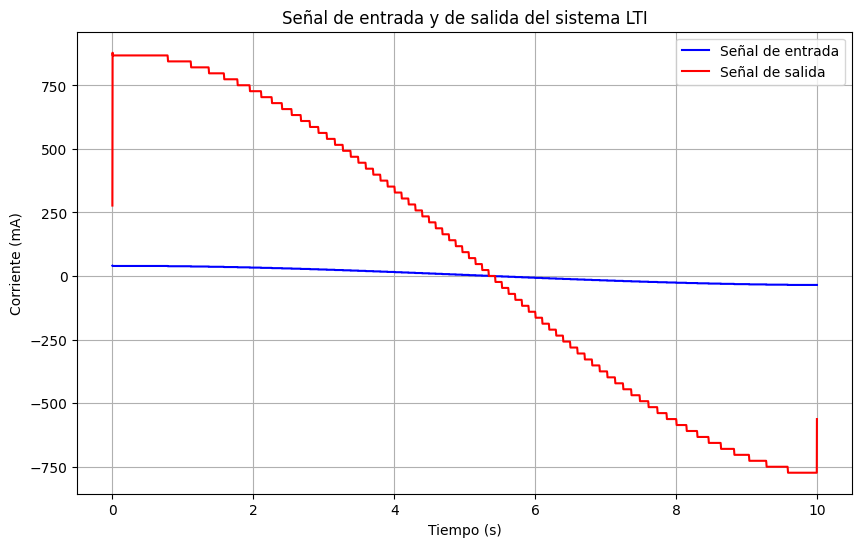

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = np.array([2, 4, 1, 5, 0, 10])

# Definición de la señal de entrada
def x(t):
    return 20 * (np.cos(t/3) + np.cos(t/4))

# Parámetros de la discretización y cuantificación
T_muestreo = 0.001  # Periodo de muestreo de 1 ms
t = np.arange(0, 10, T_muestreo)  # Vector de tiempo de 0 a 10 segundos
x_discreta = x(t)

# Cuantificación de la señal discreta de entrada a 4 bits
bits = 4
max_entrada = 20  # 20 mA
min_entrada = 4   # 4 mA
rango_entrada = max_entrada - min_entrada
paso_entrada = rango_entrada / (2 ** bits - 1)
x_discreta_quant = np.round(x_discreta / paso_entrada) * paso_entrada

# Convolución de la señal de entrada con la respuesta al escalón
y_discreta = np.convolve(x_discreta_quant, h, mode='same')

# Cuantificación de la señal discreta de salida a 4 bits
max_salida = 20  # 20 mA
min_salida = 4   # 4 mA
rango_salida = max_salida - min_salida
paso_salida = rango_salida / (2 ** bits - 1)
y_discreta_quant = np.round(y_discreta / paso_salida) * paso_salida

# Escalamiento y desplazamiento de la señal de salida
y_discreta_scaled = (y_discreta_quant - min_salida) * (max_salida - min_salida) / rango_salida + min_salida

# Gráfica de la señal de entrada y de salida
plt.figure(figsize=(10, 6))
plt.plot(t, x_discreta_quant, label='Señal de entrada', color='blue')
plt.plot(t, y_discreta_scaled, label='Señal de salida', color='red')
plt.title('Señal de entrada y de salida del sistema LTI')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (mA)')
plt.legend()
plt.grid(True)
plt.show()
